In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import random
#random.seed(200)
random.seed()

In [5]:
df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

In [223]:
df.isna().values.any()

False

In [4]:
np.random.seed(1)

In [24]:
#We start from k = 3, and I will start from only columns alcohol and Malic acid
k = 3
df.max()

Alcohol                         14.83
Malic acid                        5.8
Ash                              3.23
Alcalinity of ash                  30
Magnesium                         162
Total phenols                    3.88
Flavanoids                       5.08
Nonflavanoid phenols             0.66
Proanthocyanins                  3.58
Color intensity                    13
Hue                              1.71
OD280/OD315 of diluted wines        4
Proline                          1680
clusters                            3
color                               r
dtype: object

In [26]:
df.min()
#I print those to know how to choose points near my dataset.

Alcohol                         11.03
Malic acid                       0.74
Ash                              1.36
Alcalinity of ash                10.6
Magnesium                          70
Total phenols                    0.98
Flavanoids                       0.34
Nonflavanoid phenols             0.13
Proanthocyanins                  0.41
Color intensity                  1.28
Hue                              0.48
OD280/OD315 of diluted wines     1.27
Proline                           278
clusters                            1
color                               b
dtype: object

## Clustering in 2 dimension considering just 2 feautures (Alcohol and Malic acid)

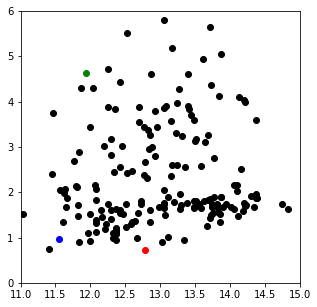

{1: [12.783604758207126, 0.7241635577413262], 2: [11.94388552343338, 4.6243122463527095], 3: [11.545610038568988, 0.9747747113236679]}
{1: [13.36021276595744, 1.717340425531915], 2: [13.024807692307697, 3.855], 3: [11.905000000000001, 1.686875]}


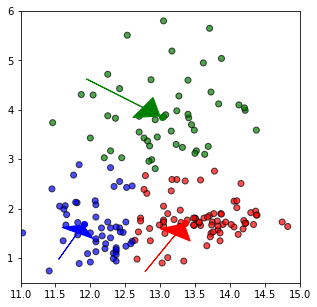

{1: [13.579605263157895, 1.7846052631578955], 2: [13.063200000000002, 3.8948], 3: [12.094230769230771, 1.644230769230769]}


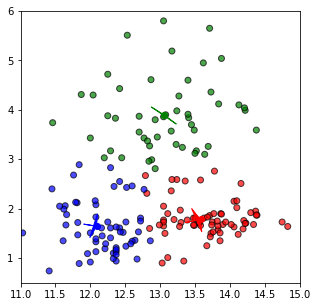

{1: [13.666376811594201, 1.8037681159420302], 2: [13.063200000000002, 3.8948], 3: [12.16898305084746, 1.638474576271186]}


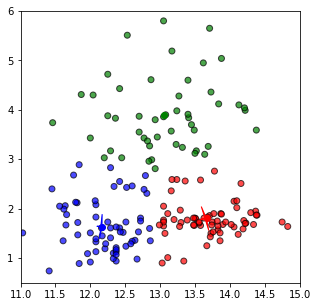

{1: [13.705000000000002, 1.786060606060607], 2: [13.063200000000002, 3.8948], 3: [12.20032258064516, 1.665322580645161]}
yeeeeeee


In [23]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

k = 3

centroids = {
    i+1:[np.random.uniform(11,15), np.random.uniform(0.5,6)] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Alcohol'], df['Malic acid'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(11,15)
plt.ylim(0,6)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['Alcohol', 'Malic acid']
    for i in range(1,k+1):
        for j in range(2):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['Alcohol'], df['Malic acid'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(*centroids[i], color = colmap[i])
    plt.xlim(11,15)
    plt.ylim(0.5,6)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,2):
            l.append(old_centroids[i][j])
        old.append(l)
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=0.5, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()
    #o = o+1
#plt.show()

Here the k-means clustering in all the dataset plotted only in 2 dimension, the first two columns.

## Example 1 with all 13 variables and projected in the Alcohol-malic acid plane

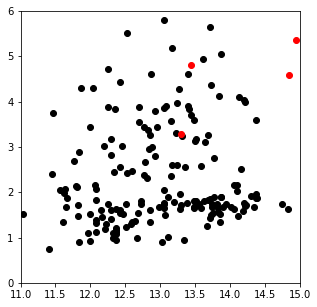

{1: [13.446295271007457, 4.798343404025737, 2.1469189002106868, 24.051437470724565, 156.1584330879696, 2.2283217591348263, 2.063685066961486, 0.1647086334234595, 2.935027325861643, 5.3502953778470985, 0.8760477243754611, 1.6385882125476048, 949.4646828030575], 2: [13.29535117642775, 3.2828262407981903, 1.7905251984610187, 26.768035855924424, 94.22643243168362, 1.3488571955431956, 4.905741804544428, 0.15559199488032158, 1.4372118663573255, 5.361840074588148, 0.7792714762565335, 2.706324408284054, 1276.8803645920655], 3: [14.94525047631425, 5.36462566064224, 2.163575397337412, 16.48371702075467, 150.09862002824144, 2.178835310484608, 1.6068279910847805, 0.13434022553857983, 3.309973083463876, 10.250684661795521, 0.9747945842916839, 1.382726324336979, 861.4873284062352], 4: [14.849319335172789, 4.577018759914418, 2.552478671636747, 11.017158761947755, 126.15391663237935, 2.9720331938775812, 1.2175443306276896, 0.13834755823456643, 1.9436198517096668, 3.374480119711085, 1.4007306118085958,

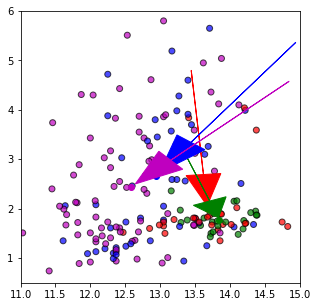

{1: [13.698148148148151, 1.944074074074074, 2.362222222222222, 17.27037037037037, 107.03703703703704, 2.7859259259259264, 2.9014814814814818, 0.27740740740740744, 1.940370370370371, 5.045925925925925, 1.067777777777778, 3.1866666666666665, 1042.851851851852], 2: [13.860000000000001, 1.7939130434782609, 2.5069565217391307, 17.07391304347826, 106.0, 2.9430434782608708, 3.110869565217391, 0.29869565217391303, 1.9260869565217387, 6.260000000000001, 1.1, 3.035652173913044, 1338.5652173913043], 3: [12.979400000000004, 2.5218000000000007, 2.3806000000000003, 19.614, 103.68, 2.108000000000001, 1.5692000000000002, 0.39099999999999996, 1.4943999999999995, 5.765, 0.8789200000000001, 2.3376, 736.86], 4: [12.519358974358973, 2.5132051282051284, 2.3175641025641025, 20.902564102564103, 92.84615384615384, 2.0541025641025645, 1.7033333333333336, 0.3910256410256409, 1.4329487179487184, 4.254743576923076, 0.9275641025641023, 2.463333333333334, 476.4102564102564]}


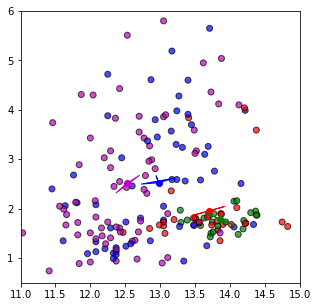

{1: [13.683793103448277, 1.9517241379310346, 2.374827586206896, 17.20344827586207, 106.96551724137932, 2.8241379310344823, 2.942068965517241, 0.2796551724137931, 1.9679310344827592, 5.136896551724137, 1.0644827586206898, 3.1886206896551723, 1052.8275862068965], 2: [13.8952380952381, 1.769047619047619, 2.503333333333334, 17.147619047619045, 106.0, 2.905238095238096, 3.0747619047619046, 0.29761904761904756, 1.8866666666666665, 6.250000000000002, 1.1076190476190475, 3.0185714285714282, 1352.952380952381], 3: [12.915789473684216, 2.520350877192983, 2.4005263157894734, 19.856140350877194, 102.66666666666667, 2.0964912280701764, 1.548947368421053, 0.3935087719298244, 1.486315789473684, 5.763508771929824, 0.8737894736842106, 2.3431578947368426, 722.5438596491229], 4: [12.525070422535212, 2.5135211267605633, 2.2953521126760563, 20.835211267605633, 92.59154929577464, 2.058028169014085, 1.732816901408451, 0.38901408450704217, 1.433380281690141, 4.107042239436619, 0.9364788732394366, 2.4712676056

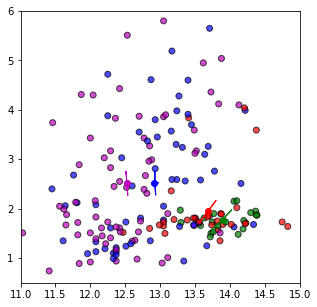

{1: [13.674000000000003, 1.9456666666666667, 2.383, 17.166666666666668, 106.5, 2.825, 2.9419999999999997, 0.2816666666666667, 1.9506666666666668, 5.125666666666666, 1.059666666666667, 3.1896666666666667, 1057.5666666666666], 2: [13.920500000000004, 1.7690000000000001, 2.4975, 17.199999999999996, 106.65, 2.9080000000000004, 3.0815, 0.2955, 1.9084999999999996, 6.322500000000001, 1.117, 3.0084999999999997, 1360.85], 3: [12.912372881355937, 2.5427118644067797, 2.4049152542372876, 19.903389830508473, 102.61016949152543, 2.0803389830508485, 1.525254237288136, 0.3920338983050846, 1.4628813559322031, 5.730847457627119, 0.8704406779661018, 2.3247457627118653, 718.3898305084746], 4: [12.516666666666666, 2.4942028985507245, 2.2885507246376817, 20.8231884057971, 92.34782608695652, 2.0707246376811597, 1.7584057971014495, 0.39014492753623176, 1.4518840579710146, 4.086956507246377, 0.941159420289855, 2.49072463768116, 458.231884057971]}


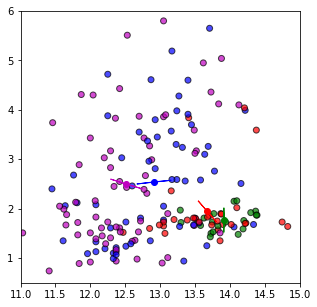

{1: [13.674000000000003, 1.9456666666666667, 2.383, 17.166666666666668, 106.5, 2.825, 2.9419999999999997, 0.2816666666666667, 1.9506666666666668, 5.125666666666666, 1.059666666666667, 3.1896666666666667, 1057.5666666666666], 2: [13.920500000000004, 1.7690000000000001, 2.4975, 17.199999999999996, 106.65, 2.9080000000000004, 3.0815, 0.2955, 1.9084999999999996, 6.322500000000001, 1.117, 3.0084999999999997, 1360.85], 3: [12.911166666666672, 2.549666666666667, 2.4083333333333328, 19.971666666666668, 102.58333333333333, 2.0843333333333343, 1.5098333333333336, 0.3943333333333332, 1.4519999999999997, 5.7173333333333325, 0.8707666666666668, 2.3218333333333345, 716.25], 4: [12.511911764705882, 2.487352941176471, 2.283823529411765, 20.776470588235295, 92.22058823529412, 2.0670588235294125, 1.7754411764705884, 0.3880882352941175, 1.4613235294117648, 4.074705867647059, 0.9419117647058823, 2.4957352941176474, 456.29411764705884]}
yeeeeeee


In [25]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

k = 4

centroids = {
    i+1:[np.random.uniform(11,15), np.random.uniform(0.5,6), np.random.uniform(1.3, 3.3), 
         np.random.uniform(10.5,30.1), np.random.uniform(69.9,162.1), np.random.uniform(0.97, 3.89), np.random.uniform(0.33, 5.09), np.random.uniform(0.12, 0.67), np.random.uniform(0.4, 3.59), np.random.uniform(1.27, 13.01), 
         np.random.uniform(0.47, 1.72), np.random.uniform(1.26, 4.01), np.random.uniform(277.9, 1680.01) ] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Alcohol'], df['Malic acid'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    #print(i)
    plt.scatter(centroids[i][0], centroids[i][1], color = 'red')
plt.xlim(11,15)
plt.ylim(0,6)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(13):
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
    for i in range(1,k+1):
        for j in range(13):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['Alcohol'], df['Malic acid'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(centroids[i][0], centroids[i][1], color = colmap[i])
    plt.xlim(11,15)
    plt.ylim(0.5,6)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,13):
            l.append(old_centroids[i][j])
        old.append(l)
        d1 = (centroids[i][0] - old_centroids[i][0]) * 0.75
        d2 = (centroids[i][1] - old_centroids[i][1]) * 0.75
        #d3 = (centroids[i][2] - old_centroids[i][2]) * 0.75
        #d3 = (centroids[i][3] - old_centroids[i][3]) * 0.75
        #d4 = (centroids[i][4] - old_centroids[i][4]) * 0.75
        #d5= (centroids[i][5] - old_centroids[i][5]) * 0.75
        #d6= (centroids[i][6] - old_centroids[i][6]) * 0.75
       #d7= (centroids[i][7] - old_centroids[i][7]) * 0.75
        #d8= (centroids[i][8] - old_centroids[i][8]) * 0.75
        #d9= (centroids[i][9] - old_centroids[i][9]) * 0.75
        #d10 (centroids[i][10] - old_centroids[i][10]) * 0.75
        #d11 centroids[i][11] - old_centroids[i][11]) * 0.75
        #d12 (centroids[i][12] - old_centroids[i][12]) * 0.75
        #d13 = (centroids[i][13] - old_centroids[i][13]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], d1, d2, head_width=0.5, head_length=np.sqrt(d1**2+d2**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()
    #o = o+1
#plt.show()

## Example 2 projected in the Total phenol-Hue plane

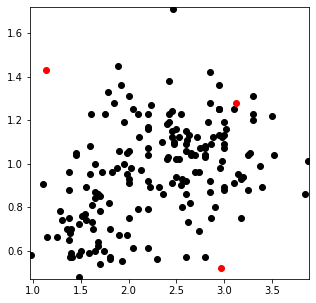

{1: [11.503708955036553, 2.3930728240033043, 2.771634656547671, 12.0648280135856, 88.05471836511586, 2.9664236127987067, 3.7753875131553065, 0.6458172948797994, 2.020717022029903, 4.260923634060859, 0.5205255027078017, 1.6198133670983452, 749.3425498439984], 2: [14.003895639491091, 1.1475840359862706, 2.2686523349822068, 18.424906572809558, 72.91784468120787, 1.1347565244085918, 2.743343158670899, 0.3016064220189476, 3.532874254087444, 7.151264886946112, 1.4316174495947118, 3.2894003803895497, 822.456644056333], 3: [11.743554237384254, 4.050248687194683, 2.099077993757403, 23.267748728918072, 156.2467531290582, 3.1186802396008986, 3.7928008095835657, 0.1331310087983383, 1.0072096576252063, 3.655861066802551, 1.2784400562201816, 3.2659668658740104, 1462.1938842555064]}
{1: [12.668260869565213, 2.521652173913044, 2.3306956521739117, 20.47217391304348, 95.6608695652174, 2.0566086956521743, 1.6312173913043482, 0.3944347826086957, 1.443652173913044, 4.753739121739132, 0.9144347826086955, 2.

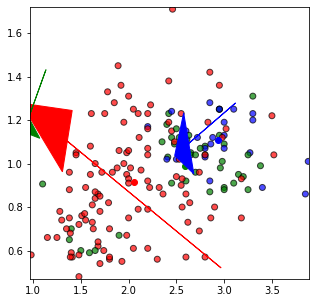

{1: [12.63315315315315, 2.504594594594595, 2.3264864864864845, 20.5990990990991, 95.09909909909909, 2.0423423423423426, 1.6078378378378382, 0.3990990990990992, 1.4344144144144144, 4.737207198198197, 0.9139639639639637, 2.3636036036036043, 539.072072072072], 2: [13.458333333333336, 2.217619047619048, 2.402619047619047, 18.264285714285712, 108.97619047619048, 2.579047619047619, 2.481666666666667, 0.3009523809523809, 1.76047619047619, 5.188809523809523, 0.9834761904761906, 3.025238095238095, 952.9285714285714], 3: [13.8632, 1.7887999999999993, 2.4836, 16.66, 104.84, 2.9404000000000003, 3.1404, 0.2988, 2.0008, 6.263200000000003, 1.1068, 3.018400000000001, 1323.48]}


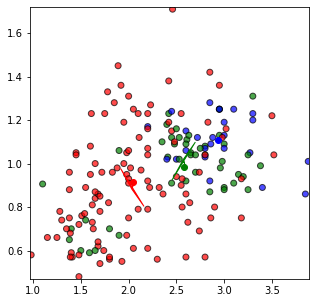

{1: [12.613364485981306, 2.519532710280374, 2.3248598130841107, 20.628037383177567, 94.42056074766356, 2.0459813084112146, 1.6236448598130844, 0.39794392523364486, 1.4307476635514018, 4.703738308411214, 0.9152336448598127, 2.380934579439253, 531.1869158878504], 2: [13.432608695652176, 2.207826086956522, 2.3997826086956517, 18.4, 109.34782608695652, 2.523913043478261, 2.368913043478261, 0.31217391304347825, 1.7406521739130434, 5.227391304347826, 0.9744782608695656, 2.927391304347826, 935.2826086956521], 3: [13.8632, 1.7887999999999993, 2.4836, 16.66, 104.84, 2.9404000000000003, 3.1404, 0.2988, 2.0008, 6.263200000000003, 1.1068, 3.018400000000001, 1323.48]}


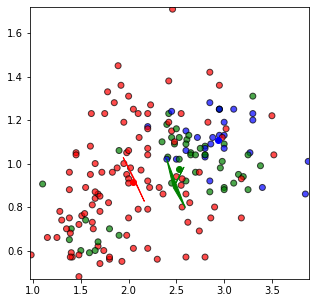

{1: [12.596952380952379, 2.4890476190476196, 2.3184761904761895, 20.625714285714285, 94.19047619047619, 2.0422857142857143, 1.6231428571428572, 0.3968571428571428, 1.4305714285714286, 4.678857133333332, 0.9166666666666663, 2.3818095238095243, 527.2571428571429], 2: [13.425957446808512, 2.3027659574468085, 2.4061702127659577, 18.465957446808506, 109.1063829787234, 2.5027659574468086, 2.3163829787234045, 0.3163829787234042, 1.7282978723404256, 5.231489361702127, 0.9654468085106386, 2.9097872340425535, 922.7234042553191], 3: [13.861923076923079, 1.7803846153846148, 2.488846153846154, 16.78846153846154, 105.23076923076923, 2.9407692307692312, 3.150384615384615, 0.3026923076923077, 1.9899999999999998, 6.276153846153847, 1.1076923076923078, 3.0011538461538474, 1316.0384615384614]}


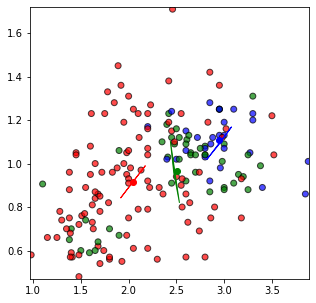

{1: [12.596952380952379, 2.4890476190476196, 2.3184761904761895, 20.625714285714285, 94.19047619047619, 2.0422857142857143, 1.6231428571428572, 0.3968571428571428, 1.4305714285714286, 4.678857133333332, 0.9166666666666663, 2.3818095238095243, 527.2571428571429], 2: [13.42304347826087, 2.3152173913043477, 2.4050000000000002, 18.42173913043478, 108.95652173913044, 2.492826086956522, 2.306304347826087, 0.3189130434782608, 1.712608695652174, 5.2093478260869555, 0.9651304347826091, 2.907173913043478, 918.4347826086956], 3: [13.850740740740742, 1.778518518518518, 2.4877777777777776, 16.925925925925927, 105.62962962962963, 2.9414814814814814, 3.1366666666666667, 0.2988888888888889, 2.007037037037037, 6.275185185185187, 1.1029629629629631, 3.0022222222222235, 1308.7777777777778]}


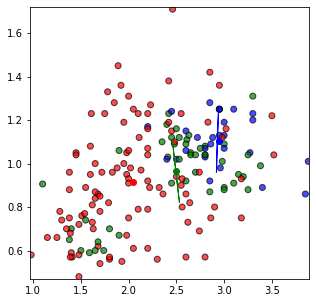

{1: [12.591442307692306, 2.463076923076924, 2.3184615384615372, 20.612499999999997, 94.20192307692308, 2.0451923076923078, 1.6326923076923079, 0.39480769230769225, 1.429423076923077, 4.64788460576923, 0.9197115384615381, 2.39048076923077, 525.3557692307693], 2: [13.417659574468084, 2.376382978723404, 2.4031914893617023, 18.49787234042553, 108.61702127659575, 2.476808510638298, 2.2706382978723405, 0.32510638297872335, 1.7091489361702128, 5.266595744680851, 0.9573617021276599, 2.876808510638298, 914.3191489361702], 3: [13.850740740740742, 1.778518518518518, 2.4877777777777776, 16.925925925925927, 105.62962962962963, 2.9414814814814814, 3.1366666666666667, 0.2988888888888889, 2.007037037037037, 6.275185185185187, 1.1029629629629631, 3.0022222222222235, 1308.7777777777778]}


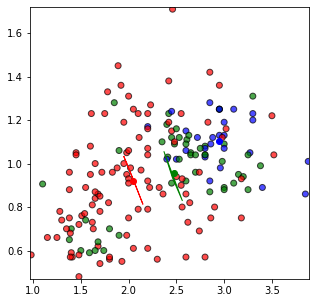

{1: [12.595145631067961, 2.4754368932038835, 2.3239805825242708, 20.6495145631068, 93.6504854368932, 2.047087378640777, 1.636116504854369, 0.3972815533980582, 1.4190291262135926, 4.665339796116504, 0.9162135922330095, 2.3838834951456316, 523.4854368932039], 2: [13.3925, 2.3516666666666666, 2.3895833333333334, 18.462499999999995, 109.5, 2.46375, 2.25, 0.32125, 1.725625, 5.21625, 0.9640833333333337, 2.8808333333333334, 910.2291666666666], 3: [13.850740740740742, 1.778518518518518, 2.4877777777777776, 16.925925925925927, 105.62962962962963, 2.9414814814814814, 3.1366666666666667, 0.2988888888888889, 2.007037037037037, 6.275185185185187, 1.1029629629629631, 3.0022222222222235, 1308.7777777777778]}


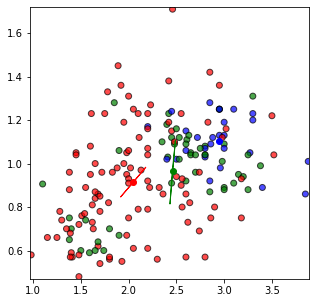

{1: [12.598529411764705, 2.4534313725490198, 2.3218627450980382, 20.64607843137255, 93.69607843137256, 2.0536274509803922, 1.6475490196078433, 0.39598039215686276, 1.4250980392156867, 4.67333332352941, 0.9178431372549017, 2.3948039215686276, 521.5588235294117], 2: [13.369183673469388, 2.4, 2.39265306122449, 18.51428571428571, 109.08163265306122, 2.4416326530612245, 2.213673469387755, 0.3255102040816326, 1.706734693877551, 5.188367346938775, 0.9597142857142861, 2.8479591836734692, 906.3469387755102], 3: [13.850740740740742, 1.778518518518518, 2.4877777777777776, 16.925925925925927, 105.62962962962963, 2.9414814814814814, 3.1366666666666667, 0.2988888888888889, 2.007037037037037, 6.275185185185187, 1.1029629629629631, 3.0022222222222235, 1308.7777777777778]}
yeeeeeee


In [13]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

k = 3

centroids = {
    i+1:[np.random.uniform(11,15), np.random.uniform(0.5,6), np.random.uniform(1.3, 3.3), 
         np.random.uniform(10.5,30.1), np.random.uniform(69.9,162.1), np.random.uniform(0.97, 3.89), np.random.uniform(0.33, 5.09), np.random.uniform(0.12, 0.67), np.random.uniform(0.4, 3.59), np.random.uniform(1.27, 13.01), 
         np.random.uniform(0.47, 1.72), np.random.uniform(1.26, 4.01), np.random.uniform(277.9, 1680.01) ] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Total phenols'], df['Hue'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    #print(i)
    plt.scatter(centroids[i][5], centroids[i][10], color = 'red')
plt.xlim(0.97, 3.89)
plt.ylim(0.47, 1.72)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(13):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            if(dist == 'nan' ):
                    print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
    for i in range(1,k+1):
        for j in range(13):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


o = 0
while True and o<400:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['Total phenols'], df['Hue'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(centroids[i][5], centroids[i][10], color = colmap[i])
    plt.xlim(0.97, 3.89)
    plt.ylim(0.47, 1.72)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,13):
            l.append(old_centroids[i][j])
        old.append(l)
        #d1 = (centroids[i][0] - old_centroids[i][0]) * 0.75
        #d2 = (centroids[i][1] - old_centroids[i][1]) * 0.75
        #d3 = (centroids[i][2] - old_centroids[i][2]) * 0.75
        #d3 = (centroids[i][3] - old_centroids[i][3]) * 0.75
        #d4 = (centroids[i][4] - old_centroids[i][4]) * 0.75
        #d5= (centroids[i][5] - old_centroids[i][5]) * 0.75
        d6= (centroids[i][6] - old_centroids[i][6]) * 0.75
       #d7= (centroids[i][7] - old_centroids[i][7]) * 0.75
        #d8= (centroids[i][8] - old_centroids[i][8]) * 0.75
        #d9= (centroids[i][9] - old_centroids[i][9]) * 0.75
        #d10 (centroids[i][10] - old_centroids[i][10]) * 0.75
        d11 = (centroids[i][11] - old_centroids[i][11]) * 0.75
        #d12 (centroids[i][12] - old_centroids[i][12]) * 0.75
        #d13 = (centroids[i][13] - old_centroids[i][13]) * 0.75
        ax.arrow(old[i-1][5], old[i-1][10], d6, d11, head_width=0.3, head_length=np.sqrt(d6**2+d11**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()
    if o == 399:
        print('my man here I crashed and died with honor, give me better points next time bro')
    o = o+1
#plt.show()

# ANddddddddddddd here the distributions colored beacause they are already clustered!!

In [7]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,clusters,color
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,g
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,g
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,g
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,g
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3,b


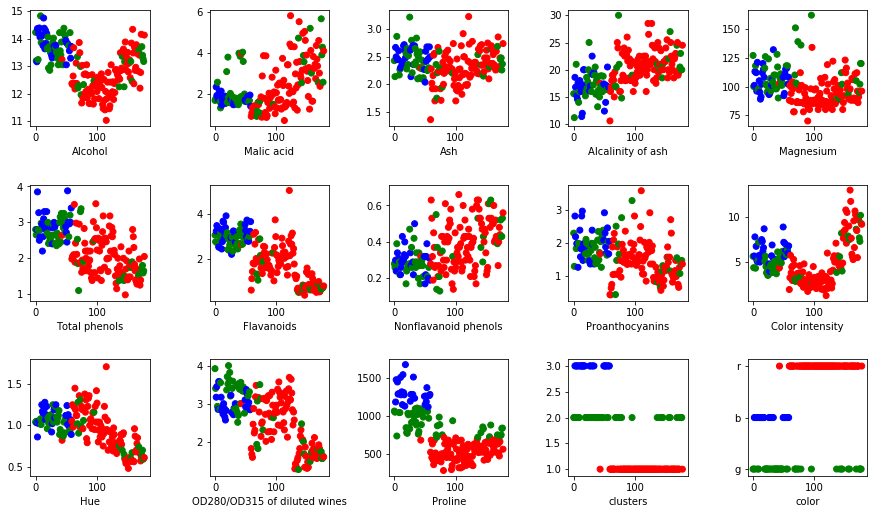

In [14]:
fig= plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
x=1
#len(df.columns)
for i in df:
    ax=fig.add_subplot(5,5,x)
    #ax.scatter(range(len(df)), df[i], c = df['clusters'].map(lambda x:colmap[x]))
    ax.scatter(range(len(df)), df[i], c = df['color'])
    ax.set_xlabel(i)
    x+=1

If you were wondering....choose 3 as clusters because we used the elbow method to find the best number of clusters!

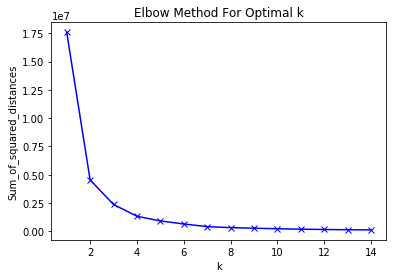

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')
Sum_of_squared_distances = []
k = range(1,15)
for ks in k:
    km = KMeans(n_clusters=ks)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(k, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()